In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
import pandas as pd

%matplotlib inline

In [7]:
f = '/storage/MEOPAR-TREX/2021/MEOPAR_TREX_2021_osker_20211028.csv'
d = pd.read_csv(f)
groups = d.groupby('Device')

In [8]:
lon_min=-69
lon_max=-58
lat_min=45
lat_max=50
mydevice_mag=300434065932960
mydevice_breton=300434065736650
mydevice_breton2=300434065937970
mydevice_winterhouse=300434065731640
winterhouse_recovery_coords=(48.694781, -58.928848)

In [34]:
def plot_tracks(groups, ax):
    bmap = Basemap(projection='merc',llcrnrlon=lon_min, urcrnrlon=lon_max,
                   llcrnrlat=lat_min,urcrnrlat=lat_max, ax=ax,resolution='i')
    bmap.fillcontinents(color='grey',)
    bmap.drawparallels(np.arange(lat_min, lat_max, 2.),labels=[1,0,0,0])
    bmap.drawmeridians(np.arange(lon_min, lon_max,2.), labels=[0,0,0,1])
    bmap.drawcoastlines()
    for g, dg in groups:
        x,y = bmap(dg['Longitude'].values, dg['Latitude'].values)
        lw=1
        label='__nolabel__'
        color='C0'
        if g == mydevice_winterhouse:
            lw=4
            label = 'Recovered device track'
            color='C1'
            xr,yr = bmap(winterhouse_recovery_coords[1], winterhouse_recovery_coords[0])
            bmap.plot(xr,yr,'*',color='C3',markersize=20,label='approximate recovery location', markeredgecolor='k')
            print(dg['Timestamp'])
        bmap.plot(x,y,linewidth=lw, label=label,color=color)
        bmap.plot(x[-1],y[-1],'o',color='C2',label='__nolabel__')
        bmap.plot(x[0],y[0],'o',color='C3',label='__nolabel__')

/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until


1204    Oct 2 2021 03:00:33.001 AM
1206    Oct 2 2021 02:01:10.001 AM
1209    Oct 2 2021 01:22:42.001 AM
1216    Oct 2 2021 12:00:09.001 AM
1219    Oct 1 2021 11:00:09.001 PM
                   ...            
6785    Sep 7 2021 12:10:05.001 PM
6790    Sep 7 2021 12:00:33.001 PM
6797    Sep 7 2021 11:50:06.001 AM
6805    Sep 7 2021 11:40:07.001 AM
6811    Sep 7 2021 11:31:23.001 AM
Name: Timestamp, Length: 950, dtype: object


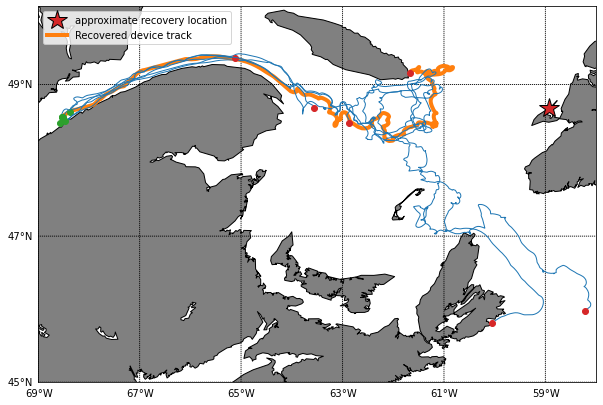

In [35]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
plot_tracks(groups,ax)
ax.legend()

In [33]:
fig.savefig('WinterHouseReocvery.png', bbox_inches='tight')